In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
path = '../../data/'
parcel = pd.read_csv(path + 'EXTR_Parcel.csv', encoding = 'latin-1')
res = pd.read_csv(path + 'EXTR_ResBldg.csv')
sale = pd.read_csv(path + 'EXTR_RPSale.csv')

/Users/jarodc33/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jarodc33/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sale.shape

(2072949, 24)

In [4]:
sale.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,


In [5]:
def add_pin(df):
    df['pin'] = df['Major'].astype(str).str.zfill(6) + df['Minor'].astype(str).str.zfill(4)
    return df

In [6]:
parcel = add_pin(parcel)
res = add_pin(res)
sale = add_pin(sale)

In [46]:
# sale = sale.drop_duplicates(subset = 'pin')

In [47]:
merged = pd.merge(pd.merge(res, sale, on = 'pin', how = 'inner'), parcel, on = 'pin', how = 'inner')

In [48]:
merged.shape

(487961, 156)

In [18]:
for i in sorted(merged.columns):
    print(i)

AFCurrentUseLand
AFForestLand
AFHistoricProperty
AFNonProfitUse
Access
AddnlCost
Address
AdjacentGolfFairway
AdjacentGreenbelt
AirportNoise
Area
Bath3qtrCount
BathFullCount
BathHalfCount
Bedrooms
BldgGrade
BldgGradeVar
BldgNbr
BrickStone
BuildingNumber
BuyerName
Cascades
CoalMineHazard
Condition
Contamination
CriticalDrainage
CurrentUseDesignation
CurrentZoning
DNRLease
DaylightBasement
DeedRestrictions
DevelopmentRightsPurch
DirectionPrefix
DirectionSuffix
DistrictName
DocumentDate
Easements
ErosionHazard
ExciseTaxNbr
FinBasementGrade
FpAdditional
FpFreestanding
FpMultiStory
FpSingleStory
Fraction
HBUAsIfVacant
HBUAsImproved
HeatSource
HeatSystem
HistoricSite
HundredYrFloodPlain
InadequateParking
LakeSammamish
LakeWashington
LandfillBuffer
LandslideHazard
LevyCode
LotDepthFactor
Major
Major_x
Major_y
Minor
Minor_x
Minor_y
MtRainier
NativeGrowthProtEsmt
NbrBldgSites
NbrLivingUnits
Obsolescence
Olympics
OtherDesignation
OtherNuisances
OtherProblems
OtherView
Page
PcntComplete
PcntNetCon

In [49]:
merged['Sqft'] = merged['SqFtTotLiving'] + merged['SqFtFinBasement'] + merged['SqFtDeck']
trimmed = merged[(merged['SalePrice'] < 5000000) & (merged['SqFtTotLiving'] < 50000) & (merged['SalePrice'] > 10)]
sqft = trimmed['SqFtTotLiving']
price = trimmed['SalePrice']

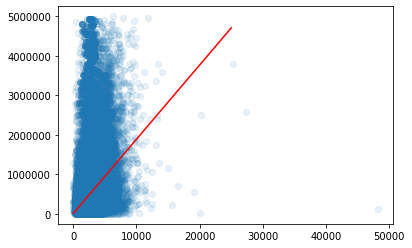

In [50]:
x = np.linspace(0, 25000, num = 1000)
y = x * 187.7 + 1.248 * 10 ** 4
plt.scatter(sqft, price, alpha = 0.1)
plt.plot(x, y, color = 'r')

In [51]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving + SqFtOpenPorch + SqFtDeck + TidelandShoreland", data=trimmed).fit()

In [52]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 1.749e+04
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:54:33   Log-Likelihood:            -4.8734e+06
No. Observations:              340552   AIC:                         9.747e+06
Df Residuals:                  340547   BIC:                         9.747e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.526e+04   1688.524     14.958      0.000    2.19e+04    2.86e+04
SqFtTotLiving       169.9672      0.784    216.683      0.000     168.430     171.505
SqFtOpenPorch       163.4337      6.029     27.109      0.000     151.618     175.250
SqFtDeck            -33.4894      2.158    -15.519      0.000     -37.719     -29.260
TidelandShoreland  2.479e+05   3868.184     64.083      0.000     2.4e+05    2.55e+05
==============================================================================
Omnibus:                   298803.021   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13838908.855
Skew:                           4.085   Prob(JB):                         0.00
Kurtosis:                      33.142   Cond. No.                     1.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9814294482342996
Rainbow p-value: 0.9999450182256641


In [15]:
corr = merged.corr()["SalePrice"]

In [16]:
corr['SqFtTotLiving']

0.17198383602338405

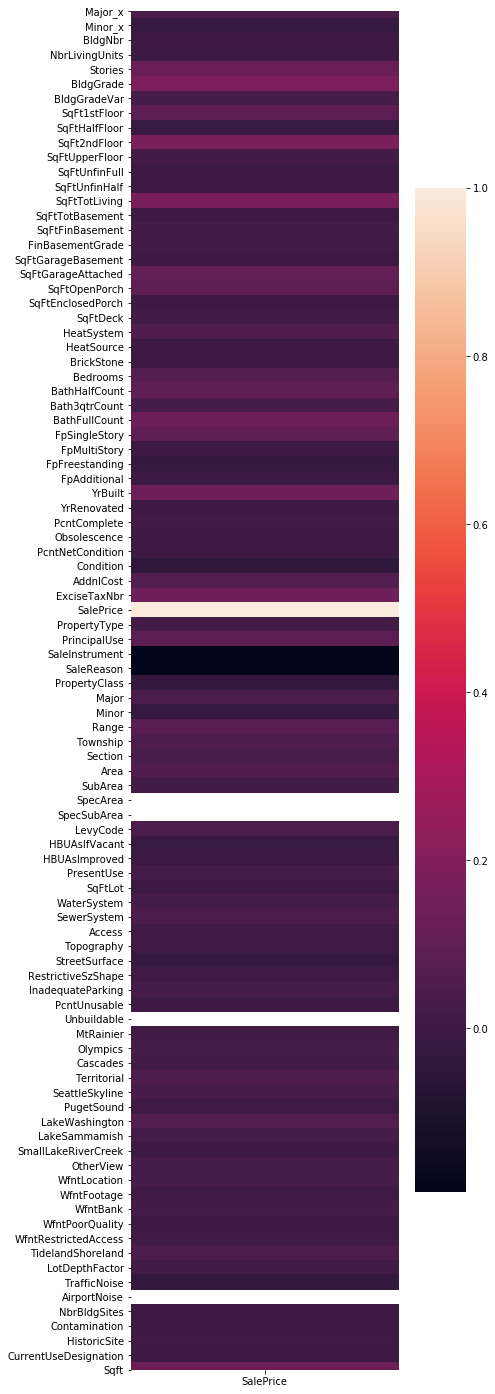

In [17]:
'''
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1)
'''

fig1, ax1 = plt.subplots(figsize=(6, 25))

sns.heatmap(pd.DataFrame(corr), ax = ax1)